In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [6]:
df.head() #observam multe coloane, fiecare cu un "calificativ", care poate fi redus la un numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.columns #hai sa ne uitam dupa valori nule

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df.describe()# cautam caracterisitici nule, dar nu se afiseaza chair toate caracterisiticle

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.isnull().sum() #obersvam ca avem valori lipsa la Teacher_Quality, Parental_Education_Level, Distance_from_Home
#cred ca cel mai bine ar fi sa convertim la numeric datele pentru a le analiza daca sunt MAR sau MNAR

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Text(0.5, 1.0, 'Missing values heat Map')

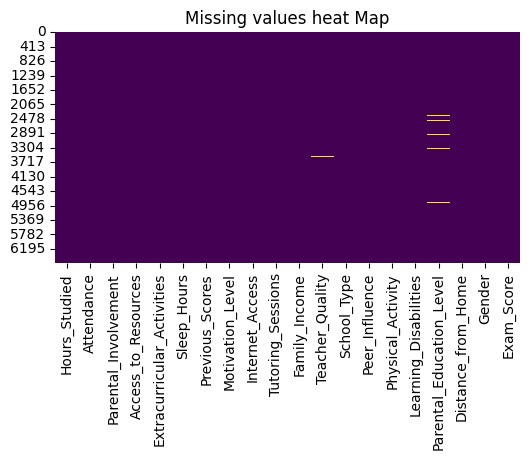

In [10]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heat Map")
#valorile par destul de aleator raspandite, deci nu pare a fi o eroare sistemica inca

In [11]:
# hai sa convertim datele in numeric

#Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions,
#Physical_activity si Exam_Score raman la fel

#Parental_Involvement, Acces_to_Rescources, Extracurricular_Activities, Motivation_level,
#Teacher_Quality, Familiy_Income  devin 0-low, 1-medium, 3-high

#Internet_Acces, School_Type, Learning_Disability, Gender devine de tip boolean Yes-True, No-False

#Peer_Presure devine 0-Negative,1-Neutral,2-Positive

#Parental_Education_level devine 0-Highschool, 1-Collage, 2-PostGraduate

#Distance_From_Home devine Near-0, Moderate-1, Far-2

In [29]:
df_numeric = df.copy()

level_mapping = {'Low': 0, 'Medium': 1, 'High': 3}
bool_mapping = {'Yes': True, 'No': False}
peer_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
edu_mapping = {'High School': 0, 'College': 1, 'Postgraduate': 2}
dist_mapping = {'Near': 0, 'Moderate': 1, 'Far': 2}

cols_to_map = [
    'Parental_Involvement', 'Access_to_Resources', 
    'Motivation_Level', 'Teacher_Quality', 'Family_Income'
]
for col in cols_to_map:
    df_numeric[col] = df[col].map(level_mapping)

bool_cols = ['Internet_Access', 'Learning_Disabilities', 'Extracurricular_Activities'] 
for col in bool_cols:
    df_numeric[col] = df[col].map(bool_mapping)

df_numeric['School_Type'] = df['School_Type'].map({'Public': True, 'Private': False})
df_numeric['Gender'] = df['Gender'].map({'Male': True, 'Female': False})

df_numeric['Peer_Influence'] = df['Peer_Influence'].map(peer_mapping)
df_numeric['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_mapping)
df_numeric['Distance_from_Home'] = df['Distance_from_Home'].map(dist_mapping)

df_numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,3,False,7,73,0,True,0,0,1.0,True,2,3,False,0.0,0.0,True,67
1,19,64,0,1,False,8,59,0,True,2,1,1.0,True,0,4,False,1.0,1.0,False,61
2,24,98,1,1,True,7,91,1,True,2,1,1.0,True,1,4,False,2.0,0.0,True,74
3,29,89,0,1,True,8,98,1,True,1,1,1.0,True,0,4,False,0.0,1.0,True,71
4,19,92,1,1,True,6,65,1,True,3,1,3.0,True,1,4,False,1.0,0.0,False,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,3,1.0,True,2,2,False,0.0,0.0,False,68
6603,23,76,3,1,False,8,81,1,True,3,0,3.0,True,2,2,False,0.0,0.0,False,69
6604,20,90,1,0,True,6,65,0,True,3,0,1.0,True,0,2,False,2.0,0.0,False,68
6605,10,86,3,3,True,6,91,3,True,2,0,1.0,False,2,3,False,0.0,2.0,False,68


In [66]:
#avand in vedere ca valorile lipsa sunt destul de mici fata de celalte valori
#cred ca cel mai ok ar fi sa le inlocium cu mediana
teacher_median = df_numeric['Teacher_Quality'].median()
parental_edu_median = df_numeric['Parental_Education_Level'].median()
distance_median = df_numeric['Distance_from_Home'].median()

df_numeric['Teacher_Quality'] = df_numeric['Teacher_Quality'].fillna(teacher_median)
df_numeric['Parental_Education_Level'] = df_numeric['Parental_Education_Level'].fillna(parental_edu_median)
df_numeric['Distance_from_Home'] = df_numeric['Distance_from_Home'].fillna(distance_median)

df_numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,General_Effort_Index,Efficiency_Index,Resources_Score,Academic_Power_Index,Academic_Effort,General_Effort,Free_Time,Academic_Power,Resourceful_Power_Index,Cultural_Capital_Index
0,23,84,0,3,False,7,73,0,True,0,...,0.222326,0.000000,2.0,24.703876,0.277907,0.222326,0.333333,0.523876,1.153333,0.865000
1,19,64,0,1,False,8,59,0,True,2,...,0.153721,0.000000,1.0,19.839535,0.192151,0.153721,0.444444,0.232868,0.393333,0.420000
2,24,98,1,1,True,7,91,1,True,2,...,0.613643,0.178295,1.0,30.828295,0.517054,0.613643,0.722222,0.768295,0.717778,0.788333
3,29,89,0,1,True,8,98,1,True,1,...,0.566899,0.217054,1.0,33.125388,0.458624,0.566899,0.777778,0.778721,0.653333,0.490000
4,19,92,1,1,True,6,65,1,True,3,...,0.585388,0.139535,1.0,22.072868,0.481734,0.585388,0.666667,0.506202,0.544444,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,...,0.248295,0.186047,1.0,25.594380,0.310368,0.248295,0.277778,0.434380,0.840000,0.630000
6603,23,76,3,1,False,8,81,1,True,3,...,0.323992,0.170543,1.0,27.303876,0.404990,0.323992,0.333333,0.510543,0.873333,0.655000
6604,20,90,1,0,True,6,65,0,True,3,...,0.513372,0.000000,0.5,22.063953,0.391715,0.513372,0.555556,0.497287,0.211111,0.408333
6605,10,86,3,3,True,6,91,3,True,2,...,0.621860,0.209302,2.0,30.619767,0.527326,0.621860,0.611111,0.559767,1.606667,1.205000


In [69]:
Q1 = df_numeric['Exam_Score'].quantile(0.25)
Q3 = df_numeric['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #identificam outliere
upper_bound = Q3 + 1.5 * IQR

outliers = df_numeric[(df_numeric['Exam_Score'] < lower_bound) | (df_numeric['Exam_Score'] > upper_bound)]
#scoatem outlieri

outliers.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,General_Effort_Index,Efficiency_Index,Resources_Score,Academic_Power_Index,Academic_Effort,General_Effort,Free_Time,Academic_Power,Resourceful_Power_Index,Cultural_Capital_Index
94,18,89,3,1,True,4,73,1,True,3,...,0.565736,0.131783,1.0,24.706783,0.457171,0.565736,0.444444,0.526783,0.820000,0.740000
106,31,100,1,1,False,7,59,1,True,2,...,0.456202,0.232558,1.0,20.232558,0.570252,0.456202,0.444444,0.625891,0.504444,0.628333
113,35,99,3,3,True,7,85,0,True,2,...,0.603140,0.000000,2.0,28.921899,0.503924,0.603140,0.611111,0.821899,1.566667,1.425000
209,43,86,3,1,True,7,97,1,True,2,...,0.642016,0.325581,1.0,32.875581,0.552519,0.642016,0.555556,0.855581,0.980000,0.735000
217,19,70,1,0,False,7,54,3,True,0,...,0.333721,0.418605,0.5,18.222868,0.417151,0.333721,0.277778,0.249535,0.137778,0.103333
404,17,77,0,3,True,5,53,1,True,2,...,0.476085,0.124031,2.0,17.932364,0.345107,0.476085,0.555556,0.285698,1.020000,0.890000
529,15,83,1,1,False,7,97,1,True,2,...,0.296783,0.108527,1.0,32.633527,0.370979,0.296783,0.277778,0.613527,0.757778,0.568333
558,22,70,0,1,False,7,53,0,True,1,...,0.172674,0.000000,1.0,17.912791,0.215843,0.172674,0.333333,0.266124,0.353333,0.265000
560,22,71,0,3,True,9,56,3,True,1,...,0.577674,0.488372,2.0,18.921124,0.472093,0.577674,0.777778,0.294457,1.040000,0.905000
637,20,65,1,0,True,7,62,3,True,0,...,0.513372,0.441860,0.5,20.855620,0.391715,0.513372,0.500000,0.268953,0.191111,0.393333


0


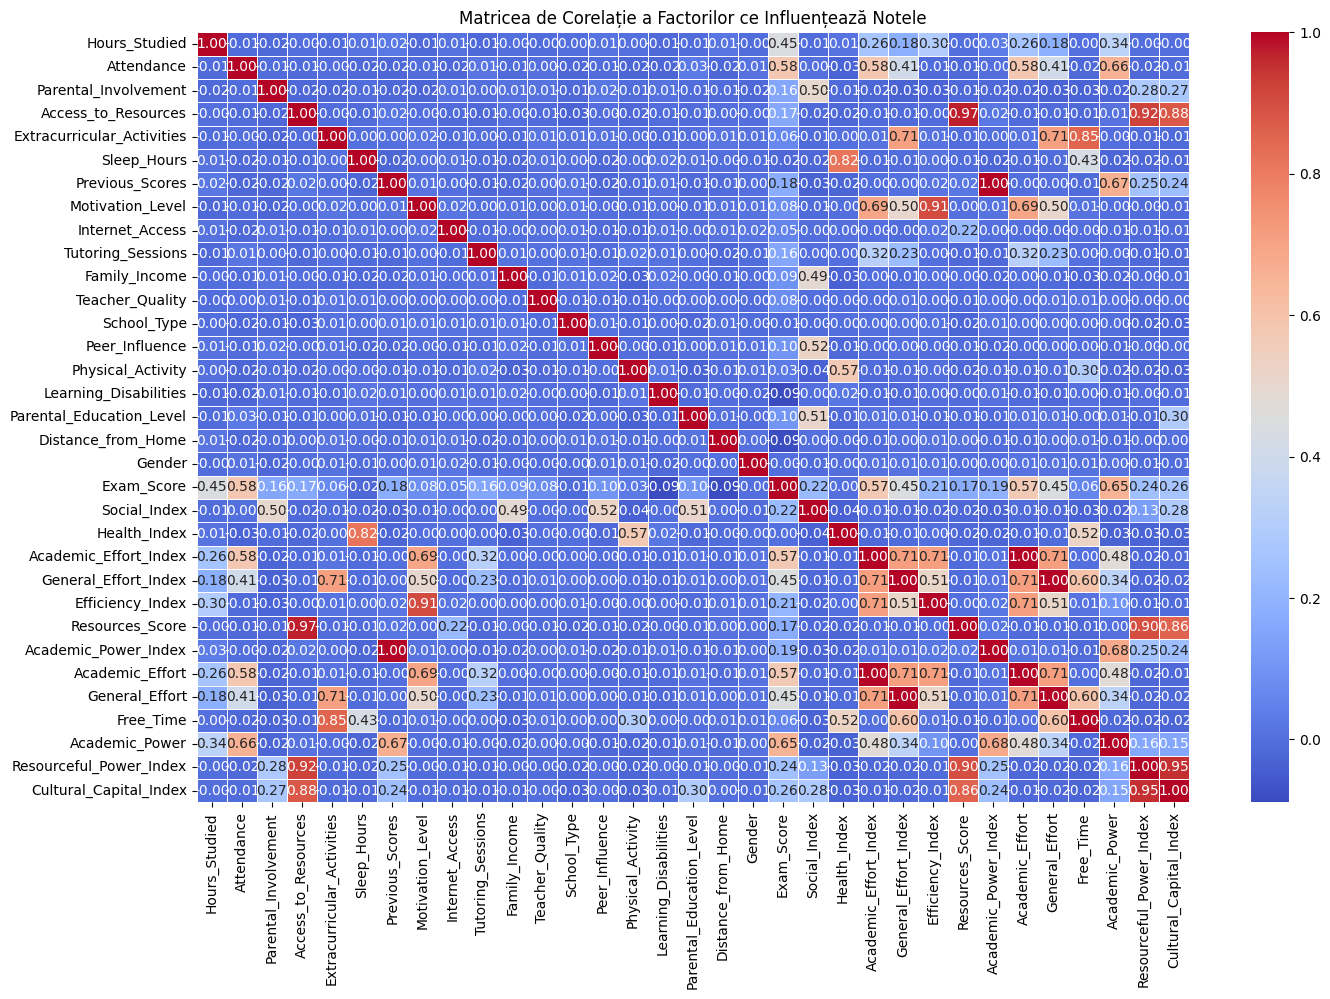

In [71]:
corr_matrix=df_numeric.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de Corelație a Factorilor ce Influențează Notele')
plt.show()
#cele mai considerabile corelatii pentru nota finala sunt: orele studiate si prezenta
#totusi avem inca mult zgomot in date

In [41]:
df_simplified=df_numeric.copy()
df_simplified['Social_Support_Score']=(df_numeric['Parental_Involvement'] + 
                                      df_numeric['Parental_Education_Level'] + 
                                      df_numeric['Family_Income'])
df_simplified['Health_Score'] = df_numeric['Sleep_Hours'] + df_numeric['Physical_Activity']

df_simplified['Academic_Effort_Score'] = (df_numeric['Hours_Studied'] + 
                                       df_numeric['Tutoring_Sessions'] + 
                                       df_numeric['Motivation_Level'])
new_corr = df_simplified[['Social_Support_Score', 'Health_Score', 'Academic_Effort_Score', 'Exam_Score']].corr()
print(new_corr['Exam_Score'])

Social_Support_Score     0.204259
Health_Score             0.002065
Academic_Effort_Score    0.477241
Exam_Score               1.000000
Name: Exam_Score, dtype: float64


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Selectăm coloanele pe care vrem să le combinăm
cols_to_scale = [
    'Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence',
    'Sleep_Hours', 'Physical_Activity', 
    'Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Motivation_Level'
]

scaler = MinMaxScaler()
df_scaled = df_numeric.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_numeric[cols_to_scale])
# 1. Pilonul Social (Mediul de susținere)
df_numeric['Social_Index'] = (df_scaled['Parental_Involvement'] + 
                             df_scaled['Parental_Education_Level'] + 
                             df_scaled['Family_Income'] + 
                             df_scaled['Peer_Influence']) / 4

# 2. Pilonul de Sănătate (Well-being)
df_numeric['Health_Index'] = (df_scaled['Sleep_Hours'] + 
                             df_scaled['Physical_Activity']) / 2

# 3. Pilonul Academic (Efort direct)
df_numeric['Academic_Effort_Index'] = (df_scaled['Hours_Studied'] + 
                                      df_scaled['Attendance'] + 
                                      df_scaled['Tutoring_Sessions'] + 
                                      df_scaled['Motivation_Level']) / 4

# Verificăm noile corelații
print(df_numeric[['Social_Index', 'Health_Index', 'Academic_Effort_Index', 'Exam_Score']].corr()['Exam_Score'])

Social_Index             0.224125
Health_Index             0.002065
Academic_Effort_Index    0.571243
Exam_Score               1.000000
Name: Exam_Score, dtype: float64


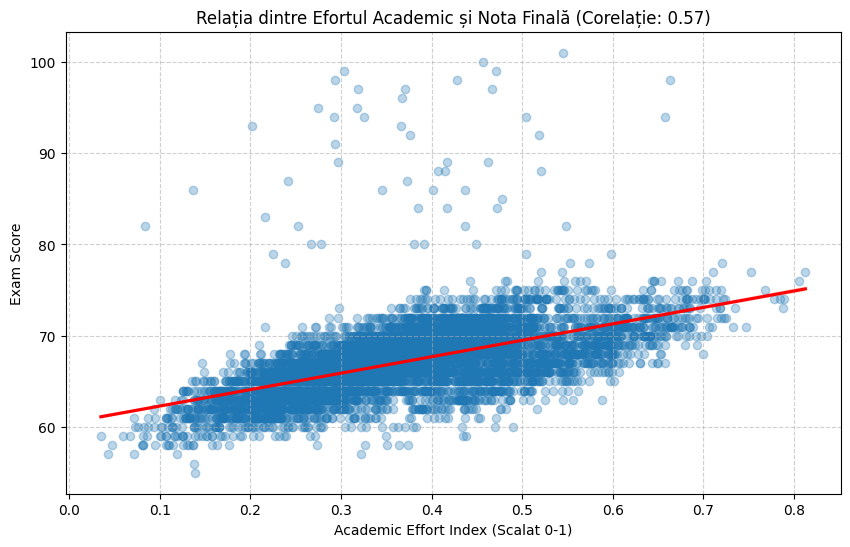

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Regplot desenează punctele și linia de tendință
sns.regplot(x='Academic_Effort_Index', y='Exam_Score', data=df_numeric, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title(f'Relația dintre Efortul Academic și Nota Finală (Corelație: 0.57)')
plt.xlabel('Academic Effort Index (Scalat 0-1)')
plt.ylabel('Exam Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [44]:
# Adăugăm și Extracurricular_Activities în lista de scalare dacă nu a fost deja
if 'Extracurricular_Activities' in df_numeric.columns:
    df_scaled['Extracurricular_Activities'] = scaler.fit_transform(df_numeric[['Extracurricular_Activities']])

# Creăm Indexul de Efort General (media celor 5 factori)
df_numeric['General_Effort_Index'] = (
    df_scaled['Hours_Studied'] + 
    df_scaled['Attendance'] + 
    df_scaled['Tutoring_Sessions'] + 
    df_scaled['Extracurricular_Activities'] + 
    df_scaled['Motivation_Level']
) / 5

# Verificăm noua corelație
correlation = df_numeric[['General_Effort_Index', 'Exam_Score']].corr().iloc[0, 1]
print(f"Corelația noului Index de Efort General cu Exam_Score este: {correlation:.4f}")

Corelația noului Index de Efort General cu Exam_Score este: 0.4485


In [45]:
# Creăm câteva combinații noi pe df_scaled (ca să fie pe aceeași scară)
df_numeric['Efficiency_Index'] = (df_scaled['Hours_Studied'] * df_scaled['Motivation_Level'])
df_numeric['Resources_Score'] = (df_scaled['Access_to_Resources'] + df_scaled['Internet_Access']) / 2

# Verificăm noile corelații cu nota
new_combos = df_numeric[['Efficiency_Index', 'Resources_Score', 'Exam_Score']].corr()['Exam_Score']
print(new_combos)

Efficiency_Index    0.206593
Resources_Score     0.173778
Exam_Score          1.000000
Name: Exam_Score, dtype: float64


In [46]:
# Să testăm această combinație "Powerhouse"
df_numeric['Academic_Power_Index'] = (df_scaled['Hours_Studied'] + 
                                     df_scaled['Attendance'] + 
                                     df_scaled['Previous_Scores']) / 3

print(df_numeric[['Academic_Power_Index', 'Exam_Score']].corr()['Exam_Score'])

Academic_Power_Index    0.191023
Exam_Score              1.000000
Name: Exam_Score, dtype: float64


In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Scalăm tot ce avem nevoie pentru a fi siguri (0-1)
scaler = MinMaxScaler()
cols_to_scale = [
    'Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence',
    'Sleep_Hours', 'Physical_Activity', 'Hours_Studied', 'Attendance', 
    'Tutoring_Sessions', 'Motivation_Level', 'Extracurricular_Activities', 'Previous_Scores'
]
df_scaled = df_numeric.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_numeric[cols_to_scale])

# 2. Calculăm toate metricile din listă
df_numeric['Social_Index'] = df_scaled[['Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence']].mean(axis=1)
df_numeric['Health_Index'] = df_scaled[['Sleep_Hours', 'Physical_Activity']].mean(axis=1)
df_numeric['Academic_Effort'] = df_scaled[['Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Motivation_Level']].mean(axis=1)
df_numeric['General_Effort'] = df_scaled[['Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Motivation_Level', 'Extracurricular_Activities']].mean(axis=1)
df_numeric['Free_Time'] = df_scaled[['Sleep_Hours', 'Physical_Activity', 'Extracurricular_Activities']].mean(axis=1)
df_numeric['Academic_Power'] = df_scaled[['Hours_Studied', 'Attendance', 'Previous_Scores']].mean(axis=1)

# 3. Raportul Final de Corelație
metrics = ['Social_Index', 'Health_Index', 'Academic_Effort', 'General_Effort', 'Free_Time', 'Academic_Power']
report = df_numeric[metrics + ['Exam_Score']].corr()['Exam_Score'].sort_values(ascending=False)

print("--- RAPORT FINAL DE CORELAȚIE ---")
print(report)

--- RAPORT FINAL DE CORELAȚIE ---
Exam_Score         1.000000
Academic_Power     0.654121
Academic_Effort    0.571243
General_Effort     0.448485
Social_Index       0.224125
Free_Time          0.056043
Health_Index       0.002065
Name: Exam_Score, dtype: float64


In [48]:
# Creăm Indexul de Resurse și Istoric
df_numeric['Resourceful_Power_Index'] = (
    df_scaled['Parental_Involvement'] + 
    df_scaled['Access_to_Resources'] + 
    df_scaled['Previous_Scores']
) / 3

# Testăm corelația
res_power_corr = df_numeric[['Resourceful_Power_Index', 'Exam_Score']].corr().iloc[0, 1]
print(f"Corelația Resourceful_Power_Index cu Exam_Score: {res_power_corr:.4f}")

Corelația Resourceful_Power_Index cu Exam_Score: 0.2430


In [49]:
# Adăugăm Parental_Education_Level la mixul de resurse și istoric
df_numeric['Cultural_Capital_Index'] = (
    df_scaled['Parental_Education_Level'] + 
    df_scaled['Parental_Involvement'] + 
    df_scaled['Access_to_Resources'] + 
    df_scaled['Previous_Scores']
) / 4

# Testăm corelația
cultural_corr = df_numeric[['Cultural_Capital_Index', 'Exam_Score']].corr().iloc[0, 1]
print(f"Corelația Cultural_Capital_Index cu Exam_Score: {cultural_corr:.4f}")

Corelația Cultural_Capital_Index cu Exam_Score: 0.2639


In [50]:
# Alegem coloanele care au dat corelații bune
features_list = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Motivation_Level', 'Parental_Involvement']
X = df_numeric[features_list]
y = df_numeric['Exam_Score']

In [51]:
from sklearn.model_selection import train_test_split

# Pasul A: Împărțim în Train (80%) și Test temporar (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pasul B: Împărțim Train-ul de mai sus pentru a scoate Validation (20% din total)
# 0.25 * 0.80 = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

Train: 3963 | Val: 1322 | Test: 1322


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanțiem și antrenăm
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [54]:
from sklearn.metrics import root_mean_squared_error

# În loc de mean_squared_error cu squared=False
rmse = root_mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Eroarea medie (RMSE): {rmse:.2f} puncte")
print(f"Scorul R^2: {r2:.2f}")

Eroarea medie (RMSE): 2.61 puncte
Scorul R^2: 0.57


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Definirea modelului și a grilei de hiperparametri
# Încercăm diverse adâncimi (max_depth) și numere de arbori (n_estimators)
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# 2. GridSearchCV pentru a găsi cea mai bună combinație
# Folosim cv=5 (5-fold cross validation) ca în exemplul Titanic
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

# 3. Cel mai bun model găsit
best_rf = grid_search.best_estimator_

# 4. Evaluare pe setul de VALIDARE
y_val_pred_rf = best_rf.predict(X_val)
rmse_val_rf = root_mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print(f"Cei mai buni parametri: {grid_search.best_params_}")
print(f"RMSE Random Forest (Val): {rmse_val_rf:.2f}")
print(f"R^2 Random Forest (Val): {r2_val_rf:.4f}")

# 5. Evaluare FINALĂ pe setul de TEST
y_test_pred_rf = best_rf.predict(X_test)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f"R^2 Final pe TEST (Random Forest): {r2_test_rf:.4f}")

Cei mai buni parametri: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
RMSE Random Forest (Val): 2.69
R^2 Random Forest (Val): 0.5454
R^2 Final pe TEST (Random Forest): 0.6196


<Axes: title={'center': 'Importanța Variabilelor în Random Forest'}>

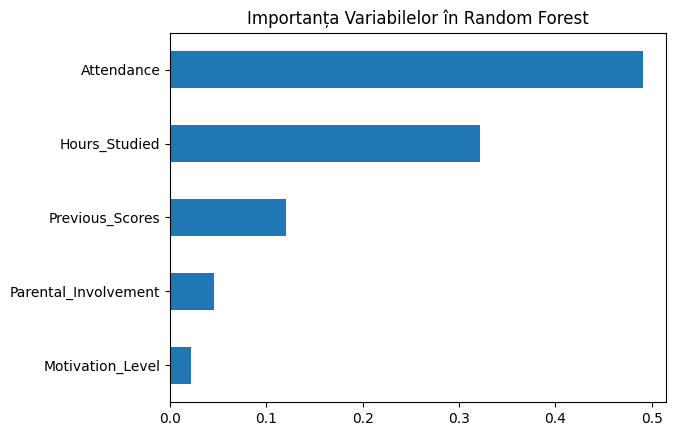

In [57]:
# Vizualizăm importanța caracteristicilor
importances = pd.Series(best_rf.feature_importances_, index=features_list)
importances.sort_values().plot(kind='barh', title='Importanța Variabilelor în Random Forest')

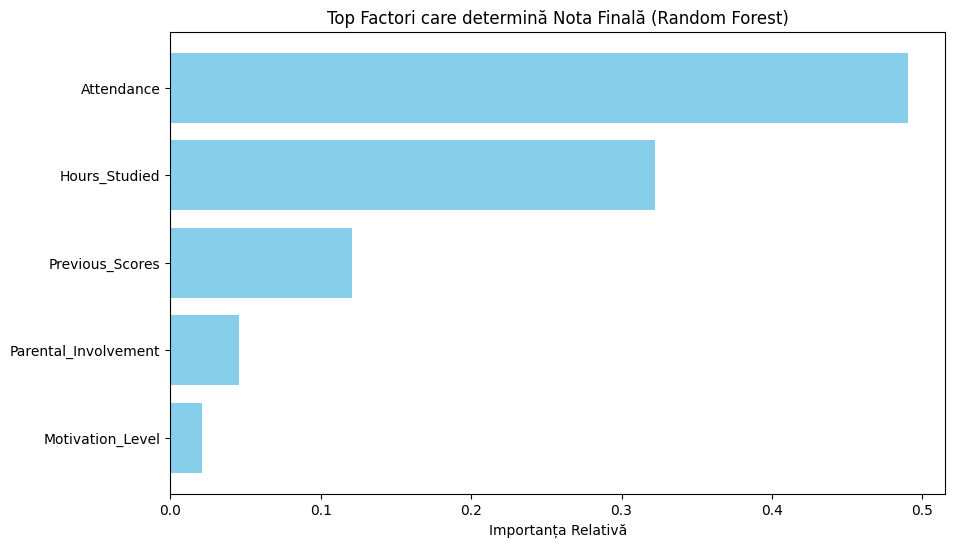

In [58]:
import matplotlib.pyplot as plt

# Extragem importanța variabilelor
importances = best_rf.feature_importances_
feature_names = features_list
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importanța Relativă')
plt.title('Top Factori care determină Nota Finală (Random Forest)')
plt.show()

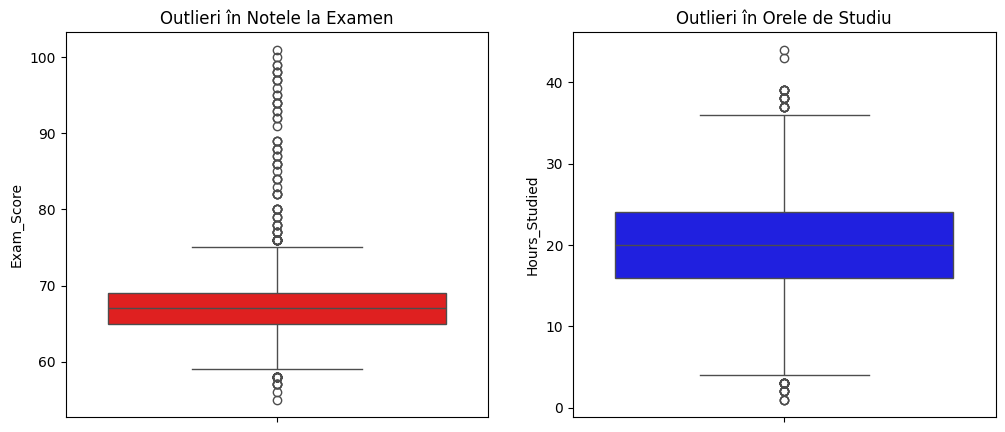

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificăm outlierii pentru variabila țintă și principalii predictori
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_numeric['Exam_Score'], color='red')
plt.title('Outlieri în Notele la Examen')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_numeric['Hours_Studied'], color='blue')
plt.title('Outlieri în Orele de Studiu')
plt.show()

In [60]:
# Calculăm IQR pentru Exam_Score
Q1 = df_numeric['Exam_Score'].quantile(0.25)
Q3 = df_numeric['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Definim limitele
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrăm dataset-ul
df_clean = df_numeric[(df_numeric['Exam_Score'] >= lower_bound) & (df_numeric['Exam_Score'] <= upper_bound)]

print(f"Rânduri inițiale: {len(df_numeric)}")
print(f"Rânduri după curățare: {len(df_clean)}")
print(f"Am eliminat {len(df_numeric) - len(df_clean)} valori extreme.")

Rânduri inițiale: 6607
Rânduri după curățare: 6503
Am eliminat 104 valori extreme.


In [61]:
# Pregătim noile seturi X și y din df_clean
X_clean = df_clean[features_list]
y_clean = df_clean['Exam_Score']

# Împărțim din nou (60-20-20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_c, y_train_c, test_size=0.25, random_state=42)

# Antrenăm cu cei mai buni parametri găsiți anterior
final_rf_clean = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)
final_rf_clean.fit(X_train_c, y_train_c)

# Evaluare finală
r2_final = r2_score(y_test_c, final_rf_clean.predict(X_test_c))
print(f"Noul R^2 după eliminarea outlierilor: {r2_final:.4f}")

Noul R^2 după eliminarea outlierilor: 0.8094


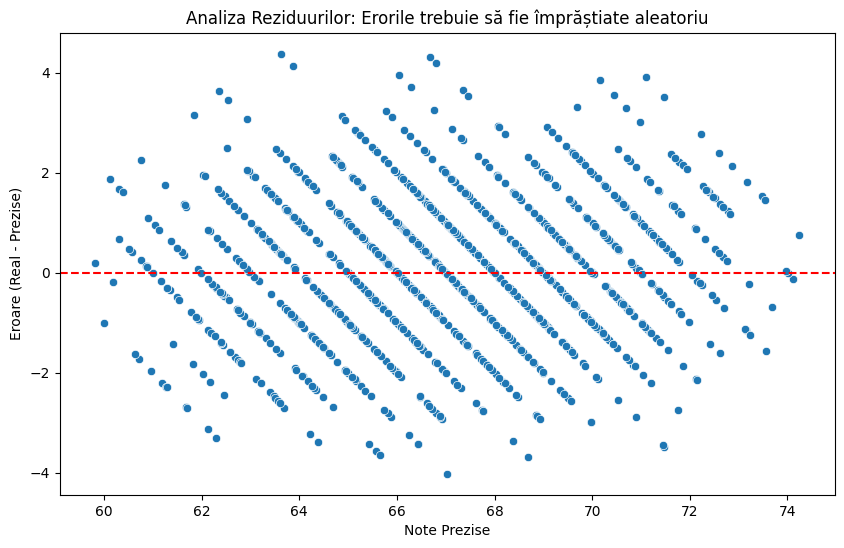

In [64]:
# Creăm interacțiunea pe setul de date curățat (df_clean)
df_clean['Effort_Snergy'] = df_clean['Motivation_Level'] * df_clean['Hours_Studied']

# Actualizăm lista de features
features_with_interaction = features_list + ['Effort_Snergy']

X_int = df_clean[features_with_interaction]
y_int = df_clean['Exam_Score']

# Împărțim datele (păstrăm proporțiile 60-20-20)
X_train_i, X_temp, y_train_i, y_temp = train_test_split(X_int, y_int, test_size=0.4, random_state=42)
X_val_i, X_test_i, y_val_i, y_test_i = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Antrenăm modelul Random Forest (folosind cei mai buni parametri anteriori)
rf_interaction = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)
rf_interaction.fit(X_train_i, y_train_i)

# Evaluare
r2_int = r2_score(y_test_i, rf_interaction.predict(X_test_i))
rmse_int = root_mean_squared_error(y_test_i, rf_interaction.predict(X_test_i))

print(f"R^2 cu Interacțiune: {r2_int:.4f}")
print(f"RMSE cu Interacțiune: {rmse_int:.2f}")

/tmp/ipykernel_39023/2811471726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Effort_Snergy'] = df_clean['Motivation_Level'] * df_clean['Hours_Studied']


R^2 cu Interacțiune: 0.8021
RMSE cu Interacțiune: 1.43


In [72]:
# Presupunem că 'df_numeric' este DataFrame-ul tău cu toate coloanele din imagine
corr_matrix = df_numeric.corr()

# Extragem corelațiile specifice pentru Exam_Score
# Folosim .abs() pentru că o corelație de -0.8 e la fel de utilă ca una de +0.8
exam_corr = corr_matrix['Exam_Score'].abs().sort_values(ascending=False)

# Eliminăm prima intrare (care este Exam_Score vs Exam_Score, adică 1.0)
top_corr_variable = exam_corr.index[1]
top_corr_value = corr_matrix.loc[top_corr_variable, 'Exam_Score']

print(f"🌟 Cea mai bună variabilă predictivă: {top_corr_variable}")
print(f"📊 Valoarea corelației: {top_corr_value:.4f}")

# Dacă vrei un Top 5 rapid:
print("\nTop 5 factori de influență:")
print(exam_corr[1:6])

🌟 Cea mai bună variabilă predictivă: Academic_Power
📊 Valoarea corelației: 0.6541

Top 5 factori de influență:
Academic_Power           0.654121
Attendance               0.581072
Academic_Effort_Index    0.571243
Academic_Effort          0.571243
General_Effort           0.448485
Name: Exam_Score, dtype: float64
